## Structure of the Project
this projects has two components
A) implementing a Dimensionality reduction algorithm to represent a task trajectory to a smaller set of of parameters.
B) building a model able to generate a trajectory given an input task trajectory


for (A) we used PCA

for (B) we used a TP-GMM

1) import libraries

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pbdlib as pbd
from scipy.io import loadmat # loading data from matlab

%matplotlib inline
%load_ext autoreload
%autoreload 2



2) load dataset 

In [27]:
df = pd.read_csv('dataset/zoo.csv', delimiter=',')
df.head()

,name,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


3) preprocessing: Standard Scaler, and Dimensionality Reduction 

In [28]:
#standard Scaler
# Separating out the features
features = ['a1', 'a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13','a14','a15','a16']
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [29]:
#dimensionality reduction
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents , columns=['principal_component_1', 'principal_component_2'])
finalDf = pd.concat([principalDf, df[['type']]], axis=1)
print(finalDf.head())

   principal_component_1  principal_component_2  type
0              -2.535256              -0.260278     1
1              -2.877354              -0.401547     1
2               1.761003               3.705592     4
3              -2.535256              -0.260278     1
4              -2.818975               0.107081     1


## trajectory encoding using GMM, ellipses depict GMM components

In [30]:
relpath = 'dataset/c.mat'
data = loadmat(relpath)
demos = [d['pos'][0][0].T for d in data['demos'][0]] # cleaning awful matlab data

0.001


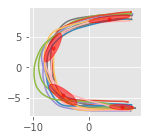

In [31]:
model = pbd.GMM(nb_dim=2, nb_states=4)

data = np.concatenate(demos)
model.em(data=data, reg=1e-3)

plt.figure(figsize=(2,2))
for p in demos:
    plt.plot(p[:, 0], p[:, 1])
    
pbd.plot_gmm(model.mu, model.sigma);



4) initialize model (GMM)

5) train model

6) evaluate / plot results

## trajectory retrieval using GMR,  solid curves represent the mean trajectories retrieved by GMR

In [ ]:
mu, sigma = model.condition(t[:, None], dim_in=slice(0, 1), dim_out=slice(1, 5))
pbd.plot_gmm(mu, sigma, dim=[0, 1], color='orangered', alpha=0.3)

for d in demos_x:
    plt.plot(d[:, 0], d[:, 1])